In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import random

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

import pickle

In [7]:
dfnba = pd.read_csv(r'/Users/andrei/Dropbox/Metis/7-Engineering/andrei-eng-project/data/df_clean.csv')
dfnba = dfnba.set_index('name-year',drop=True)
dfnba.head()

,pos,name,weight,height,Age,G,GS,MP,FG%,3P,...,TS%,year,Player,Current_Sal,Next_Sal,min_sal_curr,min_sal_next,sal_cap_curr,sal_cap_next,height_ft
name-year,,,,,,,,,,,,,,,,,,,,,
Stephen_Curry_2016,G,Stephen-Curry,185,6-2,28.0,79.0,79.0,33.4,0.468,4.1,...,0.624,2016,Stephen Curry,14.463090,39.344900,875000.0,1313000.0,94143000.0,99093000.0,6.166667
Kevin_Durant_2016,F-G,Kevin-Durant,240,6-10,28.0,62.0,62.0,33.4,0.537,1.9,...,0.651,2016,Kevin Durant,31.690926,28.360732,875000.0,1313000.0,94143000.0,99093000.0,6.833333
Gordon_Hayward_2016,F-G,Gordon-Hayward,225,6-7,26.0,73.0,73.0,34.5,0.471,2.0,...,0.595,2016,Gordon Hayward,19.192568,33.724200,875000.0,1313000.0,94143000.0,99093000.0,6.583333
Kyle_Lowry_2016,G,Kyle-Lowry,196,6-0,30.0,60.0,60.0,37.4,0.464,3.2,...,0.623,2016,Kyle Lowry,14.328925,32.789208,875000.0,1313000.0,94143000.0,99093000.0,6.000000
Otto_Porter_2016,F,Otto-Porter,198,6-8,23.0,80.0,80.0,32.6,0.516,1.9,...,0.628,2016,Otto Porter,7.037868,28.103500,875000.0,1313000.0,94143000.0,99093000.0,6.666667


In [9]:
dfnba.describe()

,weight,Age,G,GS,MP,FG%,3P,3P%,3PA,FT,...,USG%,TS%,year,Current_Sal,Next_Sal,min_sal_curr,min_sal_next,sal_cap_curr,sal_cap_next,height_ft
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,566.000000
mean,221.107774,27.851590,56.019435,24.249117,21.338163,0.465481,0.981802,0.310924,2.700707,1.384806,...,18.236396,0.558862,2018.166078,7.445250,7.789328,1.300984e+06,1.414166e+06,1.032675e+08,1.068879e+08,6.560660
std,25.505246,4.219955,19.317413,25.437130,7.174014,0.079633,0.813800,0.127083,2.061377,1.110982,...,4.690965,0.063981,1.431868,7.753353,8.126294,2.037779e+05,6.791633e+04,5.793491e+06,4.982544e+06,0.276721
min,160.000000,20.000000,1.000000,0.000000,2.300000,0.083000,0.000000,0.000000,0.000000,0.000000,...,7.200000,0.182000,2016.000000,0.081955,1.489065,8.750000e+05,1.313000e+06,9.414300e+07,9.909300e+07,5.750000
25%,200.000000,25.000000,45.250000,3.000000,16.300000,0.415250,0.300000,0.286000,1.025000,0.700000,...,14.725000,0.523000,2017.000000,1.943195,2.389641,1.313000e+06,1.339000e+06,9.909300e+07,1.018690e+08,6.333333
50%,220.000000,27.000000,60.000000,13.500000,21.100000,0.448500,0.900000,0.346000,2.400000,1.100000,...,18.000000,0.561000,2018.000000,4.434993,4.581282,1.339000e+06,1.446000e+06,1.018690e+08,1.091400e+08,6.583333
75%,240.000000,31.000000,70.000000,43.000000,26.700000,0.503000,1.500000,0.388000,3.975000,1.800000,...,21.100000,0.598000,2019.000000,9.626520,9.720900,1.446000e+06,1.446000e+06,1.091400e+08,1.091400e+08,6.750000
max,290.000000,42.000000,82.000000,82.000000,37.400000,1.000000,4.100000,1.000000,10.000000,7.200000,...,31.900000,1.000000,2020.000000,42.599503,39.344900,1.446000e+06,1.489000e+06,1.091400e+08,1.124140e+08,7.250000


In [14]:
orig_feats = list(dfnba.columns)
print(orig_feats)

['pos', 'name', 'weight', 'height', 'Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', '3PA', 'FT', 'FT%', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'USG%', 'TS%', 'year', 'Player', 'Current_Sal', 'Next_Sal', 'min_sal_curr', 'min_sal_next', 'sal_cap_curr', 'sal_cap_next', 'height_ft']


## Feature Engineering



In [120]:
# New Features

dfnba['GS/G'] = dfnba['GS']/dfnba['G']
dfnba['G/MaxG'] = dfnba['G']/82
dfnba['MP_sq'] = dfnba['MP']**2
dfnba['PTS_sq'] = dfnba['PTS']**2

In [121]:
all_feats = list(dfnba.columns)
print(all_feats)

['pos', 'name', 'weight', 'height', 'Age', 'G', 'GS', 'MP', 'FG%', '3P', '3P%', '3PA', 'FT', 'FT%', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'USG%', 'TS%', 'year', 'Player', 'Current_Sal', 'Next_Sal', 'min_sal_curr', 'min_sal_next', 'sal_cap_curr', 'sal_cap_next', 'height_ft', 'GS/G', 'G/MaxG', 'TOV/AST', 'MP_sq', 'PTS_sq']


## Linear Regression Model

In [122]:
lr = LinearRegression() 

feats = ['Age', 'G/MaxG','GS/G','MP','MP_sq','3P','3P%','FT','TRB','AST', 'TOV','PTS','PTS_sq']
X_train, X_test, y_train, y_test = train_test_split(dfnba[feats], dfnba['Next_Sal'], test_size=0.2, random_state=44)

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(lr, X_train, y_train, cv=kfold) 
print(scores) 
print("Linear Reg Mean Score: ", np.mean(scores)) 

# Build the Model 
lr.fit(X_train, y_train)

[0.56925004 0.6544828  0.7662503  0.79006938 0.54565592]
Linear Reg Mean Score:  0.6651416890057534


LinearRegression()

OLS R2 Train 0.7102366919940633
OLS R2 Test 0.5528103141349092


OLS MAE Test 3.1330204053575805 ($M)
OLS RMSE Test 5.1124172069537215 ($M)


Text(0.5, 1.0, 'OLS Residuals vs Actual Salary($M), Test Set')

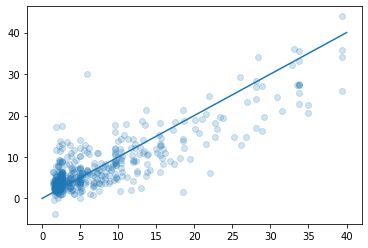

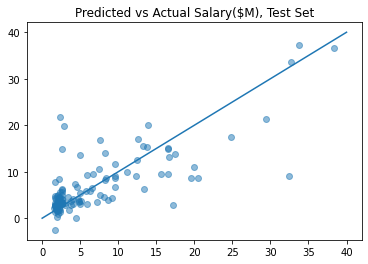

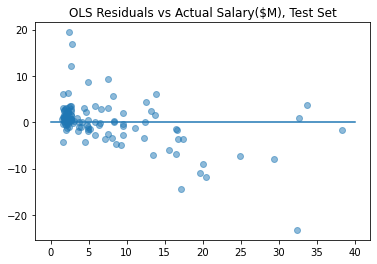

In [123]:
print('OLS R2 Train', r2_score(y_train, y_train_pred))
print('OLS R2 Test', r2_score(y_test, y_test_pred))
print('\n')
print('OLS MAE Test', mae(y_test, y_test_pred), '($M)')
print('OLS RMSE Test', np.sqrt(mean_squared_error(y_test, y_test_pred)), '($M)')

# Fitted vs. Actual Train

plt.figure()
y_train_pred = lr.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 40], [0, 40])

# Fitted vs. Actual Test

plt.figure()
y_test_pred = lr.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 40])
plt.title('Predicted vs Actual Salary($M), Test Set')

# Plot Residuals vs. predicted

plt.figure()
plt.scatter(y_test, y_test_pred - y_test, alpha=0.5)
plt.plot([0, 40], [0, 0])
plt.title('OLS Residuals vs Actual Salary($M), Test Set')

## Lasso

In [125]:
feats = ['Age', 'G/MaxG','GS/G','MP','MP_sq','3P','3P%','FT','TRB','AST', 'TOV','PTS','PTS_sq']
X_train, X_test, y_train, y_test = train_test_split(dfnba[feats], dfnba['Next_Sal'], test_size=0.2, random_state=44)

## Scale the data
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,2,400)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.018975598765218503

<BarContainer object of 13 artists>

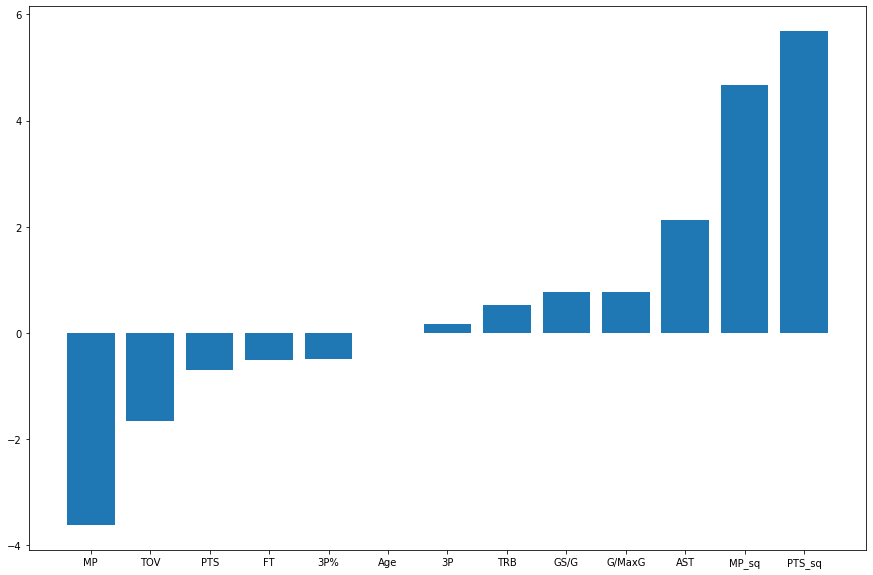

In [126]:
# plt.figure(figsize=(15, 10))
# plt.bar(sorted_feats, sorted_coeffs)
# plt.bar(X_train.columns, lasso_model.coef_)

sorted_tuples = sorted(list(zip(X_train.columns, lasso_model.coef_)), key = lambda x:x[1])
sorted_feats = [sorted_tuple[0] for sorted_tuple in sorted_tuples]
sorted_coeffs = [sorted_tuple[1] for sorted_tuple in sorted_tuples]

plt.figure(figsize=(15, 10))
plt.bar(sorted_feats, sorted_coeffs)

LASSO R2 Train 0.7055328969457955
LASSO R2 Test 0.570911491412357


LASSO MAE Test 3.0682963173739832 ($M)
LASSO RMSE Test 5.007879158437053 ($M)


Text(0.5, 1.0, 'LASSO Residuals vs Actual Salary($M), Test Set')

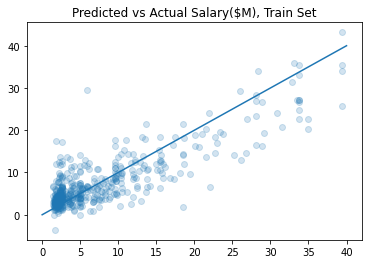

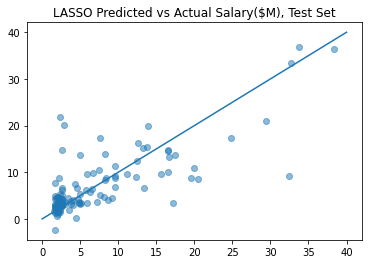

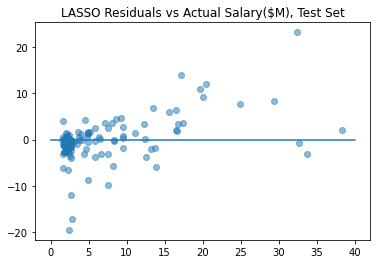

In [127]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)
train_set_pred = lasso_model.predict(X_tr)

print('LASSO R2 Train', r2_score(y_train, train_set_pred))
print('LASSO R2 Test', r2_score(y_test, test_set_pred))
print('\n')
print('LASSO MAE Test', mae(y_test, test_set_pred), '($M)')
print('LASSO RMSE Test', np.sqrt(mean_squared_error(y_test, test_set_pred)), '($M)')

# Fitted vs. Actual Train
plt.figure()
y_train_pred = lasso_model.predict(X_tr)
plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 40], [0, 40])
plt.title('Predicted vs Actual Salary($M), Train Set')

# Fitted vs. Actual Test
plt.figure()
y_test_pred = lasso_model.predict(X_te)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 40])
plt.title('LASSO Predicted vs Actual Salary($M), Test Set')

# Plot Residuals vs. predicted
plt.figure()
plt.scatter(y_test, y_test - y_test_pred, alpha=0.5)
plt.plot([0, 40], [0, 0])
plt.title('LASSO Residuals vs Actual Salary($M), Test Set')

# Save model parameters

In [128]:
# lr_filename = 'lr_model.sav'
lr_filename = r'/Users/andrei/Dropbox/Metis/7-Engineering/andrei-eng-project/data/lr_model.sav'
pickle.dump(lr,open(lr_filename,'wb'))

# lasso_filename = 'lasso_model.sav'
lasso_filename = r'/Users/andrei/Dropbox/Metis/7-Engineering/andrei-eng-project/data/lasso_model.sav'
pickle.dump(lasso_model,open(lasso_filename,'wb'))

In [129]:
loaded_model = pickle.load(open(lr_filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5664826178622566


In [130]:
loaded_model = pickle.load(open(lasso_filename, 'rb'))
result = loaded_model.score(X_te, y_test)
print(result)

0.570911491412357


In [5]:
import pandas
import numpy
print('pandas', pandas.__version__)
print('numpy',numpy.__version__)


pandas 1.3.3
numpy 1.21.2


In [4]:
import streamlit as st 

ModuleNotFoundError: No module named 'streamlit'